## Project Goal
The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and predict the average credit card balance of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. The results of the analysis could determine which customers present a risk of credit default, or what the expected consumer behavior of prospective customers will be. 

Dataset : "Credit.csv"




### Dataset description
The dataset has 400 observations with the following variables:
- ID : Identification
- Income : Income in \\$1,00,000
- Limit : credit limit
- Rating : credit rating
- Cards : number of cards
- Age : age in years
- Education : number of years of education
- Gender : Male or Female
- Student : Yes or No
- Married : Yes or No
- Ethnicity : African American, Asian or Caucasian
- Balance : average monthly credit card balance across all cards owned by the customer in $



In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load and visualize the dataset.

In [17]:
data = pd.read_csv('./Credit.csv').drop(['Unnamed: 0'], axis = 1)
data.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [18]:
print(list(data.columns))
data.describe()

['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']


,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


### Scatter Plots and Correlation Matrix

In [19]:
data.corr()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
ID,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


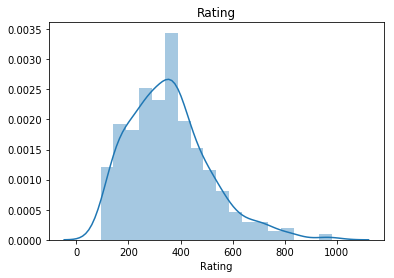

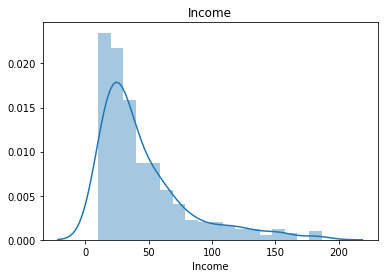

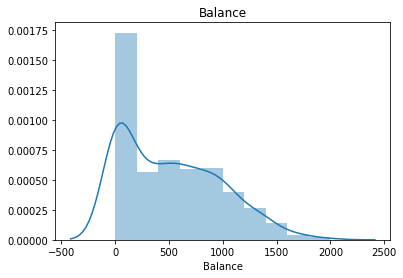

In [20]:
sns.distplot(data['Rating'])
plt.title("Rating")
plt.show()
sns.distplot(data['Income'])
plt.title("Income")
plt.show()
sns.distplot(data['Balance'])
plt.title("Balance")
plt.show()

#### Explore various encoding methodologies for categorical variables. (One-Hot and Binary encoding).

In [21]:
print(data['Student'].unique())
pd.get_dummies(data['Student'], prefix = 'Student')

['No' 'Yes']


,Student_No,Student_Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [22]:
print(data['Ethnicity'].unique())
pd.get_dummies(data['Ethnicity'], prefix = 'Ethnicity').head()

['Caucasian' 'Asian' 'African American']


,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [23]:
print(data['Gender'].unique())
pd.get_dummies(data['Gender'], prefix = 'Gender').head()

['Male' 'Female']


,Gender_Female,Gender_Male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [24]:
print(data['Married'].unique())
pd.get_dummies(data['Married'], prefix='Married').head()

['Yes' 'No']


,Married_No,Married_Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


#### Center and standardize the data.
- Why is centering (zero mean) and standardizing (unit variance) of data necessary? 
- Are the ridge regression and standard least squares coefficient estimates scale invariant? Here scale invariance implies that multiplying a predictor by a constant $c$   leads to scaling of coefficient estimates by a factor of 1/ $c$ . 

In case of zero mean, this is because some machine learning models do not include bias term in their representation so we need to move data around origin before giving it to the algorithm to copensate for bias term. Unit variance is because lots of machine learning algorithms use some kind of distance (e.g. Euclidean) to decide or predict. If a particular feature has broad values (i.e. large variance), the distance will be highly affected by that feature and the effect of other features will be ignored.

Standard Least Sqaures Coefficient is given by (XTX)^-1(XTY). We see that If we multiply the data values by a constant c. We get the coefficients to be 1/c of the previous value. Hence, It is scale invariant.

Ridge Regression Coefficient is given by (XTX + lamdaI)^-1(XTY). We see that there does not exist a direct relation between the coefficients obtained when the data values are multiplied by a constant c vs the previous coefficients. Hence it is not scale invariant.

#### Split dataset into training and validation set (80:20)

In [25]:
data_preproc = pd.get_dummies(data, prefix = ['Gender','Student','Married','Ethnicity']).drop(['Married_No',
                                                                                               'Student_No',
                                                                                               'Gender_Female',
                                                                                               'Ethnicity_Asian'],
                                                                                              axis = 1)
X,y = data_preproc.drop(['Balance','ID'], axis = 1), data_preproc['Balance']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

#### Use linear regression. 
- Report training and validation error. 

In [26]:
lin = LinearRegression()
lin.fit(X_train, y_train)

print('Training MSE is', mean_squared_error(lin.predict(X_train),y_train))
print('Validation MSE is', mean_squared_error(lin.predict(X_valid),y_valid))

Training MSE is 9517.210098742185
Validation MSE is 9614.677614418248


#### Use ridge regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

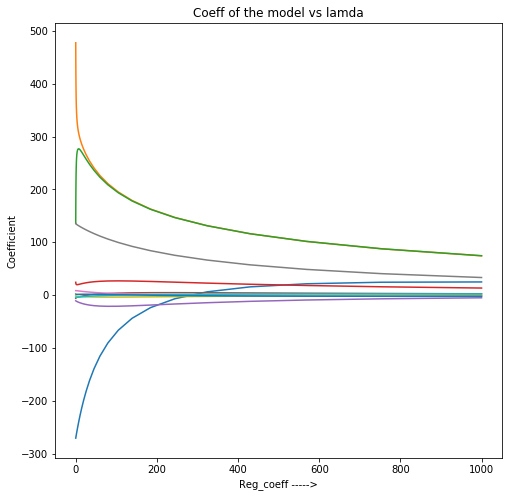

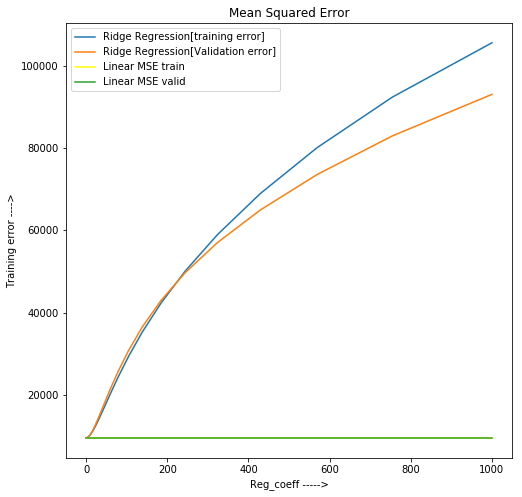

Best Ridge Reg_Coeff:  0.3727593720314938


In [27]:
reg_coeff = np.logspace(-3,3,50)
ridge_training_error = []
ridge_valid_error = []
coef = np.zeros((len(reg_coeff),11))
k=0
for i in reg_coeff:
    data1_ridge = Ridge(alpha = i)
    data1_ridge.fit(X_train_scaled, y_train)
    x_new = np.arange(-8,11,1).reshape(-1,1)
    coef[k] = data1_ridge.coef_
    k+=1
    ridge_training_error += [mean_squared_error(y_train, data1_ridge.predict(X_train_scaled))]
    ridge_valid_error += [ mean_squared_error(y_valid, data1_ridge.predict(X_valid_scaled))]

plt.figure(figsize=(8,8))
for i in range(11):
    plt.plot(reg_coeff,coef[:,i])
plt.xlabel('Reg_coeff ----->')
plt.ylabel('Coefficient')
plt.title('Coeff of the model vs lamda')

plt.figure(figsize=(8,8))
plt.plot(reg_coeff, ridge_training_error, label = 'Ridge Regression[training error]')
plt.plot(reg_coeff, ridge_valid_error, label = 'Ridge Regression[Validation error]')
plt.plot(reg_coeff, [mean_squared_error(lin.predict(X_train),y_train)]*len(reg_coeff),'yellow', label ='Linear MSE train')
plt.plot(reg_coeff, [mean_squared_error(lin.predict(X_valid),y_valid)]*len(reg_coeff), label = 'Linear MSE valid')
plt.title('Mean Squared Error')
plt.xlabel('Reg_coeff ----->')
plt.ylabel('Training error ---->')
plt.legend()
plt.show()

parameters = {'alpha': reg_coeff}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=5)
clf.fit(X,y)

print('Best Ridge Reg_Coeff: ',clf.best_params_['alpha'])

####   Use lasso regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

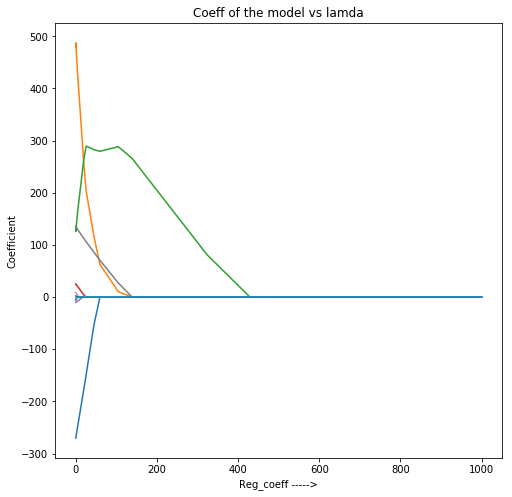

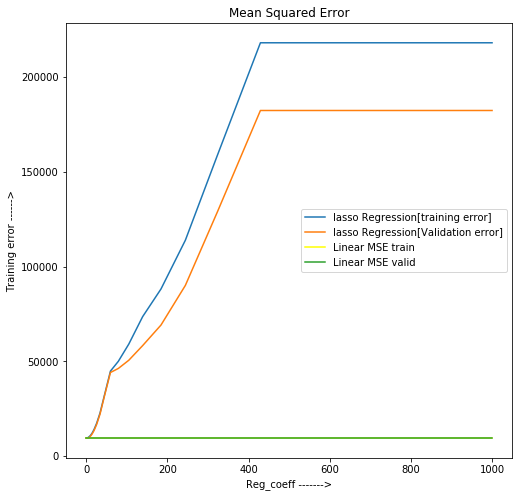

Best Lasso Reg_coeff:  1.5264179671752334


In [28]:
reg_coeff = np.logspace(-3,3,50)
lasso_training_error = []
lasso_valid_error = []
coef = np.zeros((len(reg_coeff),11))
k=0

for i in reg_coeff:
    data1_lasso = Lasso(alpha = i)
    data1_lasso.fit(X_train_scaled, y_train)
    coef[k] = data1_lasso.coef_
    k+=1
    lasso_training_error += [mean_squared_error(y_train, data1_lasso.predict(X_train_scaled))]
    lasso_valid_error += [ mean_squared_error(y_valid, data1_lasso.predict(X_valid_scaled))]

plt.figure(figsize=(8,8))
for i in range(11):
    plt.plot(reg_coeff, coef[:,i])
plt.xlabel('Reg_coeff ----->')
plt.ylabel('Coefficient')
plt.title('Coeff of the model vs lamda')

plt.figure(figsize=(8,8))
plt.plot(reg_coeff, lasso_training_error, label = 'lasso Regression[training error]')
plt.plot(reg_coeff, lasso_valid_error, label = 'lasso Regression[Validation error]')
plt.plot(reg_coeff, [mean_squared_error(lin.predict(X_train),y_train)]*len(reg_coeff),'yellow', label ='Linear MSE train')
plt.plot(reg_coeff, [mean_squared_error(lin.predict(X_valid),y_valid)]*len(reg_coeff), label = 'Linear MSE valid')
plt.title('Mean Squared Error')
plt.xlabel('Reg_coeff ------->')
plt.ylabel('Training error ------>')
plt.legend()
plt.show()

parameters = {'alpha':reg_coeff}
lasso = Lasso()
clf = GridSearchCV(lasso, parameters, cv=5)
clf.fit(X, y)

print('Best Lasso Reg_coeff: ',clf.best_params_['alpha'])

#### Observations and Inferences:
- Observe and explain the difference in the behaviour of lasso and ridge coefficients as $\lambda$ increases.
- Briefly explain which of Lasso and Ridge regression would perform better in terms of validation error and the interpretability of developed models in the the following cases:
    - The output response is related to almost all predictors.
    - The output response is only related to let's say, 6 out of 40 predictors.
- List out the features selected by Lasso regression for the optimal value of $\lambda$.

In [29]:
lasso_reg = 1.5264179671752334
lasso = Lasso(alpha = lasso_reg)
lasso.fit(X_train_scaled,y_train)
print("Coeff for Lasso: ")
print(["{0:0.2f}".format(i) for i in lasso.coef_])

ridge_reg = 0.3727593720314938
ridge = Ridge(alpha = ridge_reg)
ridge.fit(X_train_scaled,y_train)
print("Coeff for Ridge: ")
print(["{0:0.2f}".format(i) for i in ridge.coef_])

Coeff for Lasso: 
['-263.31', '469.18', '136.78', '23.37', '-9.56', '-4.05', '6.83', '133.96', '-0.00', '-2.59', '1.36']
Coeff for Ridge: 
['-268.79', '416.76', '195.14', '22.12', '-10.88', '-5.36', '8.61', '135.23', '-1.58', '-4.12', '1.81']


We can see that as we increase lamda, coefficients for Lasso becomes zero pretty faster comapred to coefficients for Ridge.

- In the case, when we have output response related to all predictors, It is better to use Ridge Regression as it is stable and faster compared to Lasso Regression and it also does not let coefficients be zero for small lamda values.

- In second case where we expect sparse solution, Lasso Regression should be used as it does feature selection.

Features are Rating, Income, Age, Cards, Limit, Gender_male, Student_yes, Ethnicity_African_American.

#### Bonus (Optional) : 
- Try out Best Subset Selection, Forward Stepwise Selection, Backward Stepwise Selection and Recursive Feature Elimination for feature selection. Compare the selected features, validation error and computational complexity for the above with Lasso/Ridge regression.
- Use elastic net regression and compare validation error with ridge and lasso regession.